Jackson, Darshil, Talia, and Ahmad World Happiness 2021 Data stuff!

3. World Happiness Report 2021

● What does happiness index look like across the
world?
\
● What affects happiness index? \
● Can you group countries based on features such
as economic production, social support, life
expectancy etc? \
● What impact did COVID-19 have on this index? \
\
More info here: https://worldhappiness.report/ed/2021/



In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ipywidgets import interact
import ipywidgets as widgets

import plotly.express as px

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

In [3]:
wh2021 = pd.read_csv('data/world-happiness-report-2021.csv')
wh2021.sample(10)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
135,Togo,Sub-Saharan Africa,4.107,0.077,4.258,3.956,7.362,0.569,54.914,0.619,0.032,0.772,2.43,0.254,0.239,0.203,0.289,0.209,0.107,2.806
78,Vietnam,Southeast Asia,5.411,0.039,5.488,5.334,8.973,0.850,68.034,0.940,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
123,Namibia,Sub-Saharan Africa,4.574,0.064,4.700,4.448,9.161,0.818,56.799,0.719,-0.149,0.847,2.43,0.882,0.801,0.262,0.411,0.091,0.059,2.068
25,Saudi Arabia,Middle East and North Africa,6.494,0.056,6.604,6.384,10.743,0.891,66.603,0.877,-0.149,0.684,2.43,1.435,0.964,0.571,0.603,0.090,0.163,2.668
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,6.312,6.045,8.836,0.918,65.255,0.970,0.311,0.515,2.43,0.769,1.027,0.528,0.716,0.391,0.271,2.477
138,India,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,60.633,0.893,0.089,0.774,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405
32,Kosovo,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,0.257,0.917,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182


In [4]:
wh = pd.read_csv('data/world-happiness-report.csv')
wh.sample(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
806,Israel,2012,7.111,10.493,0.903,72.52,0.681,0.153,0.862,0.665,0.319
978,Lebanon,2016,5.271,9.687,0.828,66.10,0.657,0.031,0.853,0.553,0.263
697,Honduras,2018,5.908,8.643,0.827,67.20,0.872,0.099,0.804,0.872,0.287
495,Ecuador,2018,6.128,9.355,0.851,68.50,0.869,-0.099,0.831,0.876,0.328
955,Latvia,2007,4.667,10.136,0.836,63.52,0.700,-0.167,0.924,0.673,0.247
1331,Palestinian Territories,2012,4.647,8.531,0.782,NaN,0.542,-0.153,0.730,0.616,0.379
1127,Moldova,2010,5.590,9.054,0.847,61.30,0.598,-0.088,0.929,0.584,0.278
1319,Pakistan,2014,5.436,8.336,0.552,57.08,0.543,0.140,0.677,0.585,0.295
344,China,2008,4.846,8.911,0.748,67.24,0.853,-0.092,NaN,0.817,0.147
102,Azerbaijan,2015,5.147,9.606,0.786,64.60,0.764,-0.198,0.616,0.607,0.206


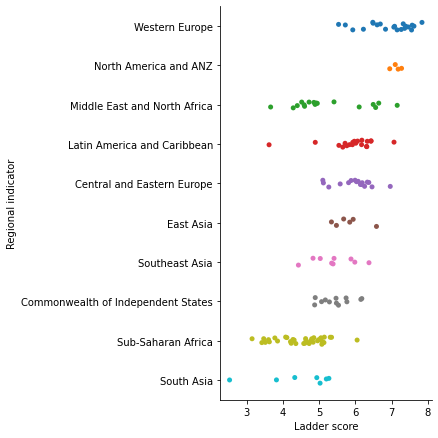

In [5]:
happy_by_country = sns.catplot(
    data=wh2021,
    y='Regional indicator', x="Ladder score",
    ci=None, orient='h', height=6
)

In [6]:
#Jackson's Section Start

In [7]:
wh2021_j = wh2021.drop(columns=['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'])
wh2021_j['year'] = 2021
wh2021_j = wh2021_j[wh2021_j['Country name'].isin(wh[wh['year']==2020]['Country name'].unique())]
wh2021_j = wh2021_j.rename(columns={'Ladder score': 'Life Ladder', 'Logged GDP per capita': 'Log GDP per capita', 'Healthy life expectancy': 'Healthy life expectancy at birth'})
wh_j = wh.drop(columns=['Positive affect', 'Negative affect'])
wh_j = wh_j[wh_j['Country name'].isin(wh2021_j['Country name'].unique())]
wh_j=wh_j.append(wh2021_j) #Add a 2021 statistic for all the countries to help get data on pre-rona v post-rona

In [8]:
wh_j[wh_j['Country name'] == 'United States']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
1836,United States,2006,7.182,10.924,0.965,68.06,0.911,NaN,0.600
1837,United States,2007,7.513,10.933,NaN,68.22,0.872,0.197,0.633
1838,United States,2008,7.280,10.922,0.953,68.38,0.878,0.255,0.668
1839,United States,2009,7.158,10.888,0.912,68.54,0.831,0.201,0.665
1840,United States,2010,7.164,10.905,0.926,68.70,0.828,0.244,0.690
1841,United States,2011,7.115,10.913,0.922,68.68,0.863,0.161,0.697
1842,United States,2012,7.026,10.928,0.903,68.66,0.823,0.215,0.710
1843,United States,2013,7.249,10.939,0.925,68.64,0.792,0.274,0.747
1844,United States,2014,7.151,10.956,0.902,68.62,0.866,0.221,0.702
1845,United States,2015,6.864,10.977,0.904,68.60,0.849,0.219,0.698


In [21]:
def countrySelector(country):
    return sns.scatterplot(data=wh_j[wh_j['Country name'] == country], x='year', y='Life Ladder')

interact(countrySelector, country='United States'); #widget to see various countries Ladder score's over years

interactive(children=(Text(value='United States', description='country'), Output()), _dom_classes=('widget-int…

In [78]:
wh_j_sorted=wh_j.sort_values(by='Country name')
rona_diff = []
summ = 0
for i in range(len(list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder']))):
        rona_diff.append((list(wh_j_sorted[wh_j_sorted['year']==2020]['Life Ladder'])[i] - list(wh_j_sorted[wh_j_sorted['year']==2021]['Life Ladder'])[i]) * -1)
        summ+= rona_diff[i]
average_rona_diff = summ/len(wh_j_sorted[wh_j_sorted['year']==2020])
print('On average, the world\'s happiness changed by', average_rona_diff, 'Life Ladder score after the pandemic started')
differ = pd.DataFrame()
differ['Country name'] = wh_j_sorted[wh_j_sorted['year']==2020]['Country name']
differ['rona_diff'] = rona_diff
differ.reset_index(drop=True)
differ.sort_values(by='rona_diff').head(10) #countries made most unhappy by rona age

On average, the world's happiness changed by -0.001473684210526275 Life Ladder score after the pandemic started


,Country name,rona_diff
1933,Zambia,-0.765
1279,Nigeria,-0.744
422,Croatia,-0.626
944,Kyrgyzstan,-0.506
356,China,-0.432
746,India,-0.406
1807,Ukraine,-0.395
1150,Mongolia,-0.334
244,Bulgaria,-0.332
550,Ethiopia,-0.274


In [79]:
differ.sort_values(by='rona_diff', ascending=False).head(10) #countries that gained happiness from rona era

,Country name,rona_diff
1394,Philippines,0.800
174,Benin,0.637
527,El Salvador,0.599
117,Bahrain,0.474
277,Cambodia,0.453
1087,Malta,0.445
497,Ecuador,0.410
482,Dominican Republic,0.377
1122,Mexico,0.353
1893,Venezuela,0.318


In [80]:
#can these be explained by the coronavirus impact in these countries
le_rona = pd.read_csv('data/owid-covid-data.csv')
le_rona = le_rona[le_rona['continent'].notna()]
le_rona = le_rona[le_rona['date']=='7/12/2021'][['location', 'total_cases', 'total_deaths']]
le_rona = le_rona.reset_index(drop=True)
le_rona['deaths per case'] = le_rona['total_deaths'] / le_rona['total_cases']
le_rona = le_rona[le_rona['location'].isin(differ['Country name'])]
le_rona = le_rona.rename(columns={'location': 'Country name'})
rona_differ = pd.merge(differ, le_rona, on='Country name')

In [81]:
px.scatter(rona_differ, y='rona_diff', x='deaths per case', color='total_deaths', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

In [82]:
px.scatter(rona_differ, y='rona_diff', x='total_deaths', color='deaths per case', opacity=1,
           title = 'Impact of the Coronavirus on a Country\'s Happiness',
           labels={'deaths per case':'Deaths per Case', 'total_deaths':'Total Deaths', 'rona_diff': 'Happiness Change After Pandemic'}, hover_name='Country name')

In [ ]:
#Still need to style and add some markdown to make the narrative clear

In [ ]:
#Jackson's Section End 